In [37]:
import pickle
import numpy as np
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

# switch the path to represent the correct directory when switching devices and fetch the latest repo from github
# Marc_PC
data_folder = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")

# Amber_laptop
#data_folder = Path(r"C:\Users\renek\OneDrive\Documenten\Marc Studiemap\Master Internship 1\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data") 

In [38]:
# Path to where the data is on your machine.
data_path = data_folder.joinpath('20230211')

In [39]:
# Visualize files in session folder.
glob.glob(str(data_path)+'\\*')

['C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\behaviour_data.pickle',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\neural_data.pickle',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\parameters.yml',
 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\data\\20230211\\trial_data.csv']

In [40]:
trial_data_file = data_path.joinpath('trial_data.csv')
trial_data = pd.read_csv(trial_data_file)
trial_data

,env_onset,tunnel1_onset,reward_zone_onset,tunnel2_onset,tunnel2_offset,trial_duration,env_label,sound_onset,sound_offset,sound_presented,reward_onset,reward_offset
0,0.0,51742,62734,84207,87311,NaN,1,48182.0,163347.0,True,63550,66561
1,87311.0,117556,120011,154259,158038,NaN,3,NaN,NaN,False,121313,124339
2,158038.0,172831,213693,242507,244749,NaN,1,166359.0,257770.0,True,231849,234863
3,244749.0,266401,269199,339747,342111,NaN,2,260775.0,363012.0,True,270289,273308
4,342111.0,372283,382112,388546,396273,NaN,1,366022.0,399709.0,True,383091,386109
5,396273.0,413147,415210,436766,437438,NaN,2,402721.0,449813.0,True,415977,418985
6,437438.0,459485,462992,471835,474908,NaN,1,452816.0,481899.0,True,464101,467108
7,474908.0,526669,539910,611337,614135,NaN,3,484920.0,617838.0,True,541697,544704
8,614135.0,665133,667664,683879,684559,NaN,3,620845.0,688756.0,True,668392,671403
9,684559.0,696625,700692,720849,724404,NaN,2,691767.0,741830.0,True,702266,705266


In [41]:
# Load behavioural data
bdata_file = data_path.joinpath('behaviour_data.pickle')
with open(bdata_file,'rb') as file:
    b_data = pickle.load(file)

In [42]:
position = b_data['position']
pos_list = []
for i in range(len(trial_data)):
    row = trial_data.iloc[i]
    onset = row['env_onset'].astype(int)
    offset = row['tunnel2_offset']

    pos_segment = position[onset:offset]
    print(f'{i}: {np.max(pos_segment)-np.min(pos_segment)}')
    # normalize
    pos_segment = (pos_segment - np.min(pos_segment))/(np.max(pos_segment)-np.min(pos_segment))
    pos_list.append(pos_segment)

0: 4455
1: 2501
2: 2100
3: 2299
4: 2204
5: 2100
6: 2398
7: 2401
8: 2208
9: 2395
10: 2493
11: 2205
12: 2451
13: 2343
14: 2554
15: 2503
16: 2555
17: 2393
18: 2503
19: 2604
20: 2451
21: 2444
22: 2498
23: 2609
24: 2259
25: 2583
26: 2802
27: 2449
28: 2505
29: 2492
30: 2407
31: 2244
32: 2255
33: 2503
34: 2206
35: 2535
36: 2404
37: 2353
38: 2250
39: 2295


# Goal 2: position of mice during events, normalized position, histogram of positions of whole session
1. extract the position timecourse in the environment of each trial (betwen env_onset and tunnel1_onset).
2. normalize the position between 0 and 1: norm_pos = (pos-min(pos))/(max(pos)-min(pos))
3. concatenate all trial positions together compute the histogram of positions across the whole session
4. numpy histogram function

This will tell us if there is a tendency from the animal to prefer parts of the environment, and will be useful down the line when we compute place cells

# Histogram: edges & centers
- Edges: The edges represent the boundaries of each bin in the histogram. These boundaries determine the range of data values that are included in each bin. By default, the edges are defined so that each bin has the same width, but you can also specify custom bin sizes if needed.
- Centers: The centers represent the midpoint of each bin in the histogram. They are commonly used to label the x-axis of the histogram, and can provide additional insight into the distribution of the data.

<BarContainer object of 10 artists>

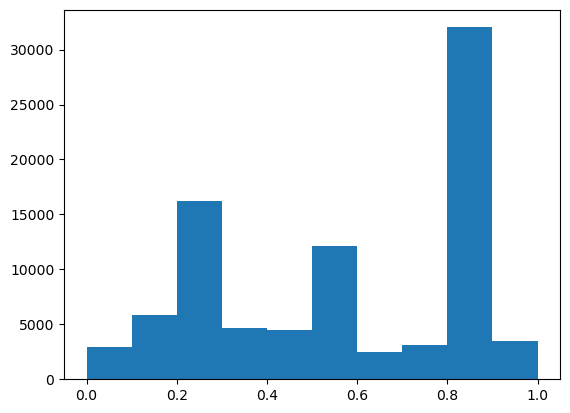

In [43]:
values,edges = np.histogram(pos_list[0])
centers = [(edges[i+1]+edges[i])/2 for i in range(len(edges)-1)]

plt.bar(centers,values,width=0.1)

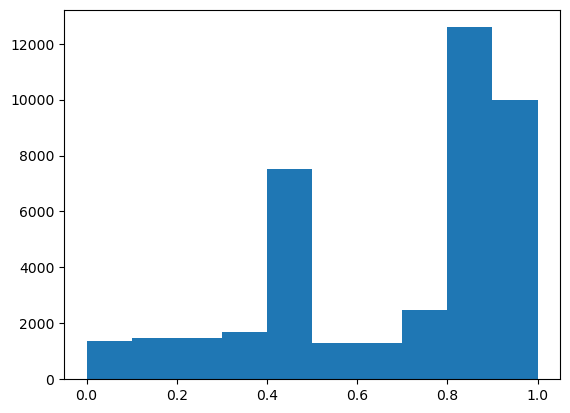

In [44]:
plt.hist(pos_list[5]);

In [45]:
#?compute_feature_position # call the doc string of a function (even homebrew functions)

# Plotting events with normalised position
goal 1:
- isolate the reward presentation for each trial. Find the number of licks that happened between the reward presentation and two seconds (2000 frames) after.
- use eventplot to plot the licks for each trial on the same plot (x axis: time, y axis: trial)
- This will tell us if there is a change in licking patterns during the course of the trial

see session_outlook.ipynb for the plot

goal 2:
- extract the poistion timecourse in the environment of each trial (betwen env_onset and tunnel1_onset).
- normalize the position between 0 and 1: norm_pos = (pos-min(pos))/(max(pos)-min(pos))
- concatenate all trial positions together compute the histogram of positions across the whole session
This will tell us if there is a tendency from the animal to prefer parts of the environment, and will be useful down the line when we compute place cells

In [46]:
import sys
sys.path.append('../src') # Add src folder to path.

import analysis as an # Import my analysis functions from /src.

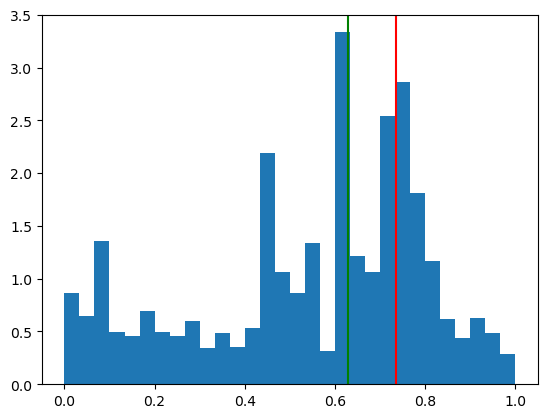

In [47]:
position = b_data['position']
rz_onsets = []
tunnel1_onsets = []
for i in range(len(trial_data)):
    row = trial_data.iloc[i]
    onset = row['env_onset'].astype(int)
    offset = row['tunnel2_offset']

    pos_segment = position[onset:offset]
    min_pos = np.min(pos_segment)
    max_pos = np.max(pos_segment)

    rz_pos = an.compute_feature_position(row['reward_zone_onset'],position,min_pos,max_pos)
    rz_onsets.append(rz_pos)

    t1_pos = an.compute_feature_position(row['tunnel1_onset'],position,min_pos,max_pos)
    tunnel1_onsets.append(t1_pos)
    
    #normalize
    pos_segment = (pos_segment - np.min(pos_segment))/(np.max(pos_segment)-np.min(pos_segment))

    if i==0:
        norm_pos = pos_segment
    else:
        norm_pos = np.hstack([norm_pos,pos_segment])

plt.hist(norm_pos,bins=30,density=True);
plt.axvline(x=np.mean(rz_onsets),c='r')
plt.axvline(x=np.mean(tunnel1_onsets),c='g')

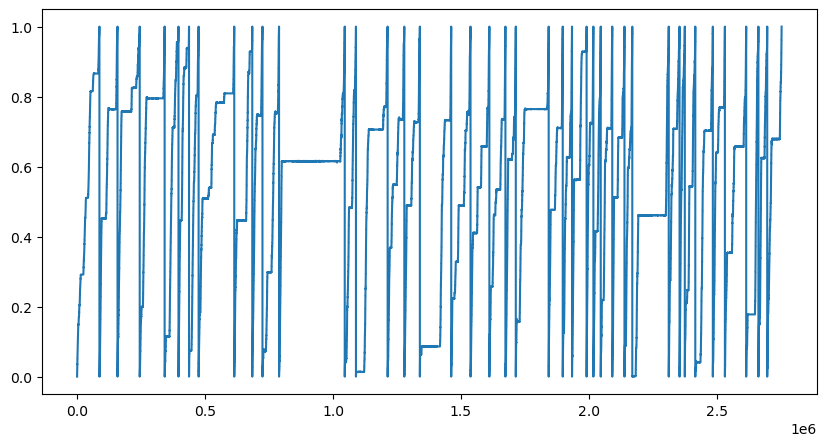

In [48]:
plt.figure(figsize=(10,5))
plt.plot(norm_pos)

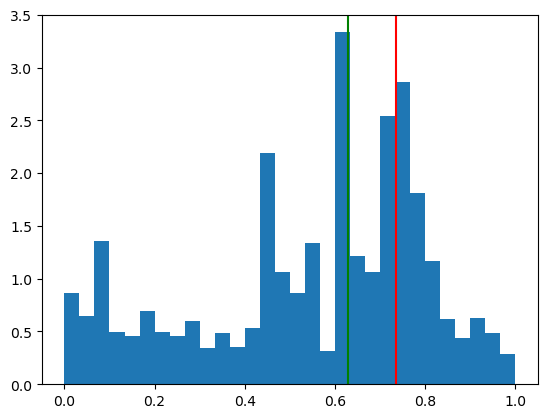

In [49]:
plt.hist(norm_pos,bins=30,density=True);
plt.axvline(x=np.mean(rz_onsets),c='r')
plt.axvline(x=np.mean(tunnel1_onsets),c='g')

In [50]:
# Insight into what the behavioural data contains.
for k in b_data.keys():
    print(f'{k} with shape: {b_data[k].shape}')

time with shape: (2813328,)
position with shape: (2813328,)
lick_onsets with shape: (3516,)
lick_offsets with shape: (3517,)
reward_onsets with shape: (40,)
reward_offsets with shape: (40,)


In [51]:
b_data['lick_offsets'][:-1]-b_data['lick_onsets']

array([ -30,  -25,  -47, ...,  -77,  -48, -655], dtype=int64)

# Position histogram with events
Verticle lines: reward zone onset, tunnel1 onset, sound onset.

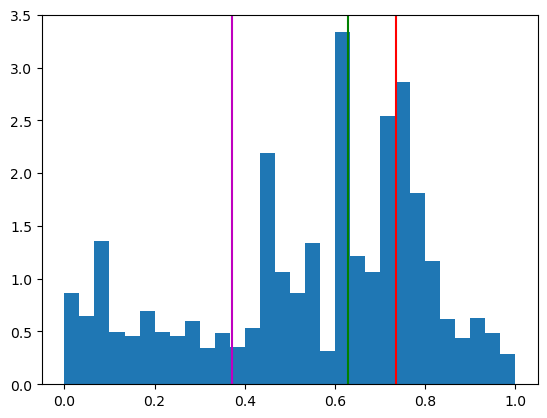

In [52]:
position = b_data['position']
rz_onsets = []
tunnel1_onsets = []
sound_onsets = []

for i in range(len(trial_data)):
    row = trial_data.iloc[i]
    onset = row['env_onset'].astype(int)
    offset = row['tunnel2_offset']

    pos_segment = position[onset:offset]
    min_pos = np.min(pos_segment)
    max_pos = np.max(pos_segment)

    rz_pos = an.compute_feature_position(row['reward_zone_onset'],position,min_pos,max_pos)
    rz_onsets.append(rz_pos)

    t1_pos = an.compute_feature_position(row['tunnel1_onset'],position,min_pos,max_pos)
    tunnel1_onsets.append(t1_pos)

    if pd.notnull(row['sound_onset']): # skip NaNs
        sound_pos = an.compute_feature_position(int(row['sound_onset']),position,min_pos,max_pos)
        sound_onsets.append(sound_pos)

    # normalize
    pos_segment = (pos_segment - np.min(pos_segment))/(np.max(pos_segment)-np.min(pos_segment))
    if i==0:
        norm_pos = pos_segment
    else:
        norm_pos = np.hstack([norm_pos,pos_segment])

plt.hist(norm_pos,bins=30,density=True);
plt.axvline(x=np.mean(rz_onsets),c='r')
plt.axvline(x=np.mean(tunnel1_onsets),c='g')
plt.axvline(x=np.nanmean(sound_onsets),c='m')

In [53]:
norm_pos # Normalised array of concatenated positional values between 0-1 per trial instead x-y frames.

array([0., 0., 0., ..., 1., 1., 1.])

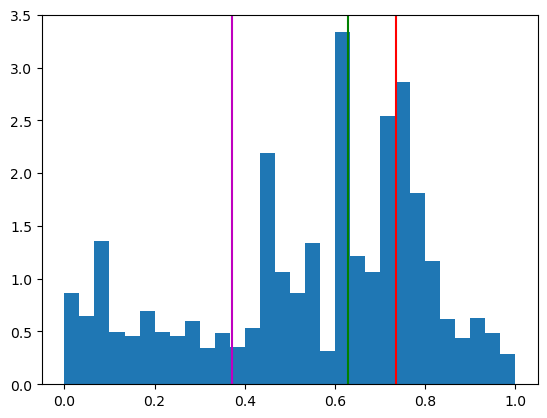

In [54]:
# Calling the histogram with the function.
an.position_event_histogram(b_data, trial_data)